In [ ]:
import pandas as pd

# Defining the URL
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2024-01-01&endtime=2024-12-31&minmagnitude=4.0"

data = pd.read_csv(url)

In [ ]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-12-30T23:56:29.977Z,-5.7603,148.9729,127.013,4.6,mb,47.0,109.0,3.367,0.44,...,2025-03-08T22:39:13.040Z,"80 km NW of Kandrian, Papua New Guinea",earthquake,9.68,7.431,0.089,38.0,reviewed,us,us
1,2024-12-30T23:40:33.868Z,-17.6089,-178.3937,573.817,4.6,mb,69.0,110.0,2.417,0.60,...,2025-03-08T22:39:13.040Z,"247 km ENE of Levuka, Fiji",earthquake,14.54,8.251,0.087,39.0,reviewed,us,us
2,2024-12-30T23:37:34.358Z,-31.5828,-179.7246,201.998,4.0,mb,12.0,145.0,2.799,0.38,...,2025-03-08T22:39:17.040Z,Kermadec Islands region,earthquake,15.10,11.011,0.173,9.0,reviewed,us,us
3,2024-12-30T23:36:27.672Z,9.5417,40.0566,10.000,4.3,mb,17.0,131.0,1.504,0.40,...,2025-03-08T22:39:17.040Z,"46 km SE of Debre Sīna, Ethiopia",earthquake,9.15,1.825,0.148,13.0,reviewed,us,us
4,2024-12-30T23:30:59.974Z,9.1189,39.9276,10.000,4.7,mb,66.0,185.0,1.253,0.59,...,2025-03-08T22:39:13.040Z,"24 km N of Metahāra, Ethiopia",earthquake,10.00,1.969,0.075,53.0,reviewed,us,us


In [ ]:
features = data.columns.tolist()
features

['time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']

In [ ]:
!pip install geopy pandas

In [ ]:
import pandas as pd
from geopy.distance import geodesic
df=data

# Extended list of Indian metro and major cities with coordinates
metro_cities = {
    'Delhi': (28.6139, 77.2090),
    'Mumbai': (19.0760, 72.8777),
    'Kolkata': (22.5726, 88.3639),
    'Chennai': (13.0827, 80.2707),
    'Hyderabad': (17.3850, 78.4867),
    'Bengaluru': (12.9716, 77.5946),
    'Ahmedabad': (23.0225, 72.5714),
    'Pune': (18.5204, 73.8567),
    'Surat': (21.1702, 72.8311),
    'Jaipur': (26.9124, 75.7873),
    'Lucknow': (26.8467, 80.9462),
    'Kanpur': (26.4499, 80.3319),
    'Nagpur': (21.1458, 79.0882),
    'Indore': (22.7196, 75.8577),
    'Patna': (25.5941, 85.1376),
    'Bhopal': (23.2599, 77.4126),
    'Ludhiana': (30.9000, 75.8573),
    'Agra': (27.1767, 78.0081),
    'Varanasi': (25.3176, 82.9739),
    'Meerut': (28.9845, 77.7064),
    'Nashik': (19.9975, 73.7898),
    'Faridabad': (28.4089, 77.3178),
    'Vadodara': (22.3072, 73.1812),
    'Rajkot': (22.3039, 70.8022),
    'Amritsar': (31.6340, 74.8723),
    'Allahabad': (25.4358, 81.8463),
    'Visakhapatnam': (17.6868, 83.2185),
    'Coimbatore': (11.0168, 76.9558),
    'Kochi': (9.9312, 76.2673),
    'Mysuru': (12.2958, 76.6394),
    'Thiruvananthapuram': (8.5241, 76.9366),
    'Guwahati': (26.1445, 91.7362),
    'Jodhpur': (26.2389, 73.0243),
    'Madurai': (9.9252, 78.1198),
    'Raipur': (21.2514, 81.6296),
    'Chandigarh': (30.7333, 76.7794),
    'Ranchi': (23.3441, 85.3096),
}

# Extended list of major fault lines affecting India with coordinates
fault_lines = [
    (32.0, 76.0),  # Himalayas Fault Line (Main Himalayan Thrust)
    (26.0, 85.0),  # Nepal Fault Line (Indo-Gangetic Plain)
    (10.0, 78.0),  # Indian Ocean Fault Line (Sumatra Subduction Zone)
    (21.0, 88.0),  # Bengal Basin Fault (Sundarbans)
    (24.5, 73.5),  # Aravalli-Delhi Fold Belt
    (17.0, 82.0),  # Godavari Graben Fault Line
    (28.5, 79.5),  # Indo-Gangetic Basin (Delhi-Haridwar Ridge)
    (23.5, 92.5),  # Indo-Burmese Arc (Northeast)
    (34.0, 77.0),  # Karakoram Fault (Ladakh)
    (19.5, 72.5),  # Mumbai Coastal Fault
    (14.5, 74.0),  # Western Ghats Fault
    (8.0, 93.0),   # Andaman-Sumatra Subduction Zone
    (23.0, 70.0),  # Kachchh Rift Basin Fault Line
    (12.5, 75.5),  # Coorg Fault Zone
    (28.0, 90.0),  # Eastern Himalayas Fault (Arunachal)
    (23.0, 85.0),  # Chotanagpur Plateau Fault
    (9.5, 78.0),   # Mannar Basin Fault Line (Tamil Nadu)
]

# Function to calculate distance to the nearest city
def get_nearest_city(lat, lon):
    min_distance = float('inf')
    nearest_city = None
    for city, coords in metro_cities.items():
        distance = geodesic((lat, lon), coords).kilometers
        if distance < min_distance:
            min_distance = distance
            nearest_city = city
    return nearest_city, min_distance

# Function to calculate distance to the nearest fault line
def get_nearest_fault_line(lat, lon):
    min_distance = float('inf')
    for fault_coords in fault_lines:
        distance = geodesic((lat, lon), fault_coords).kilometers
        if distance < min_distance:
            min_distance = distance
    return min_distance

# Add columns for nearest city and fault line distance
df['Nearest_City'] = df.apply(lambda row: get_nearest_city(row['latitude'], row['longitude'])[0], axis=1)
df['Distance_to_Nearest_City_km'] = df.apply(lambda row: get_nearest_city(row['latitude'], row['longitude'])[1], axis=1)
df['Distance_to_Nearest_Fault_km'] = df.apply(lambda row: get_nearest_fault_line(row['latitude'], row['longitude']), axis=1)

# Save updated dataset


In [ ]:
# Categorize earthquakes
def categorize_earthquake(row):
    mag = row['mag']
    dist_city = row['Distance_to_Nearest_City_km']
    fault_dist = row['Distance_to_Nearest_Fault_km']
    depth = row['depth']

    if mag >= 6.0 or (dist_city <= 50 and fault_dist <= 100 and depth < 70):
        return 'Cat 4 (Very Dangerous)'
    elif mag >= 5.0 or (dist_city <= 100 and fault_dist <= 200):
        return 'Cat 3 (Dangerous)'
    elif mag >= 4.5 or (dist_city <= 200 and fault_dist <= 300):
        return 'Cat 2 (Medival)'
    else:
        return 'Cat 1 (Mild)'

# Apply categorization
df['category'] = df.apply(categorize_earthquake, axis=1)



In [ ]:
df=df[['latitude','longitude','depth', 'mag', 'Distance_to_Nearest_City_km', 'Distance_to_Nearest_Fault_km','category']]

In [ ]:
df.head()

,latitude,longitude,depth,mag,Distance_to_Nearest_City_km,Distance_to_Nearest_Fault_km,category
0,-5.7603,148.9729,127.013,4.6,7109.203485,6397.995048,Cat 2 (Medival)
1,-17.6089,-178.3937,573.817,4.6,10847.012778,10136.403871,Cat 2 (Medival)
2,-31.5828,-179.7246,201.998,4.0,11357.317371,10218.632924,Cat 1 (Mild)
3,9.5417,40.0566,10.000,4.3,3571.609144,3519.100559,Cat 1 (Mild)
4,9.1189,39.9276,10.000,4.7,3605.633961,3554.150066,Cat 2 (Medival)


In [ ]:
features = df.columns.tolist()
features

['latitude',
 'longitude',
 'depth',
 'mag',
 'Distance_to_Nearest_City_km',
 'Distance_to_Nearest_Fault_km',
 'category']

In [ ]:
mf=df[['latitude','longitude','depth', 'mag', 'Distance_to_Nearest_City_km', 'Distance_to_Nearest_Fault_km','category']]

In [ ]:
mf.head()

,latitude,longitude,depth,mag,Distance_to_Nearest_City_km,Distance_to_Nearest_Fault_km,category
0,-5.7603,148.9729,127.013,4.6,7109.203485,6397.995048,Cat 2 (Medival)
1,-17.6089,-178.3937,573.817,4.6,10847.012778,10136.403871,Cat 2 (Medival)
2,-31.5828,-179.7246,201.998,4.0,11357.317371,10218.632924,Cat 1 (Mild)
3,9.5417,40.0566,10.000,4.3,3571.609144,3519.100559,Cat 1 (Mild)
4,9.1189,39.9276,10.000,4.7,3605.633961,3554.150066,Cat 2 (Medival)


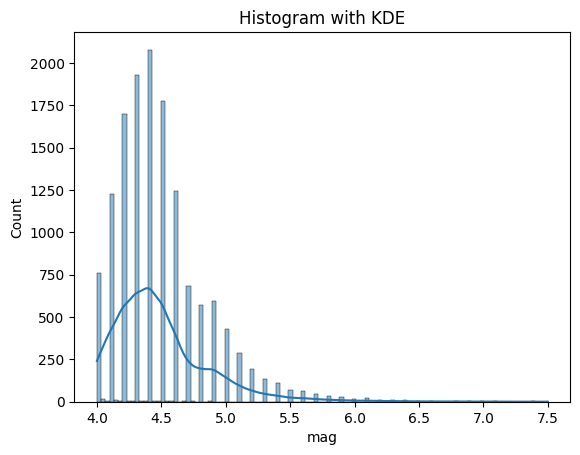

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['mag']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

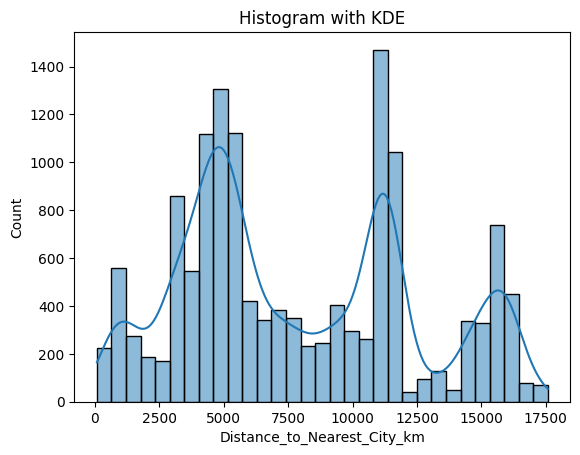

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['Distance_to_Nearest_City_km']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

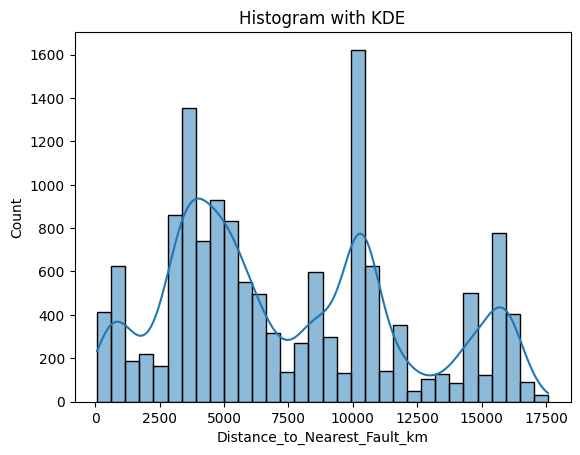

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['Distance_to_Nearest_Fault_km']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

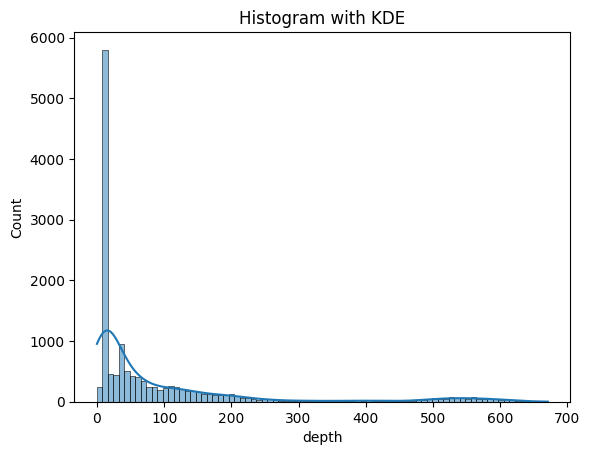

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['depth']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding
le = LabelEncoder()
mf['Category_Encoded'] = le.fit_transform(mf['category'])


In [ ]:
mf['Category_Encoded'].unique()

array([1, 0, 2, 3])

In [ ]:
import numpy as np
mf['Log_mag'] = np.log(mf['mag'] + 1)

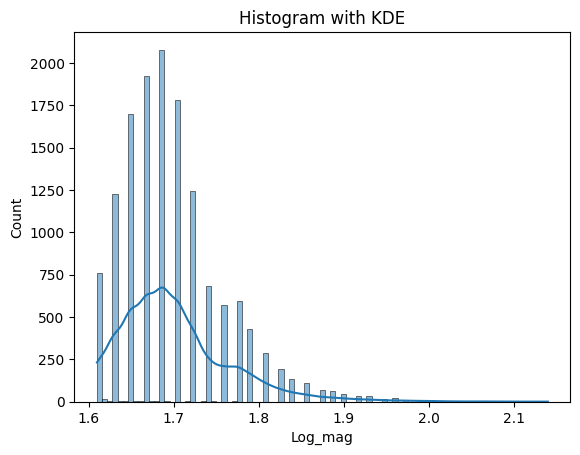

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['Log_mag']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

In [ ]:
mf['Sqrt_mag'] = np.sqrt(mf['mag'] + 1)

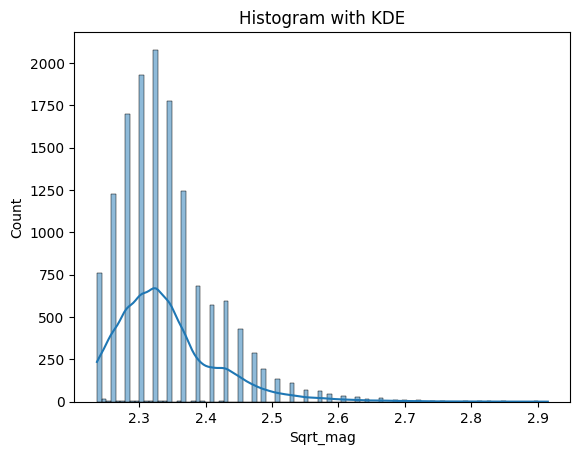

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['Sqrt_mag']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

In [ ]:
from scipy import stats

# Apply Box-Cox transformation (only works for positive values)
mf['Box_cox_mag'], lambda_val = stats.boxcox(mf['mag'] + 1)
print(f"Optimal lambda: {lambda_val}")

Optimal lambda: -6.321816224677974


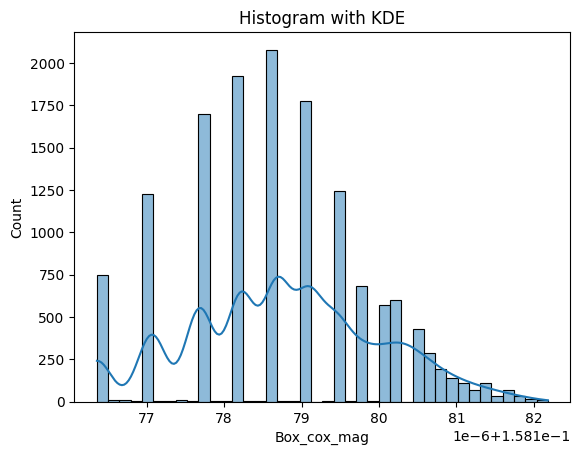

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = mf['Box_cox_mag']

# Plot histogram with KDE
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()

In [ ]:
from scipy import stats

# Apply Box-Cox transformation (only works for positive values)
mf['Box_cox_nearest_city'], lambda_val = stats.boxcox(mf['Distance_to_Nearest_City_km'] + 1)
print(f"Optimal lambda: {lambda_val}")

Optimal lambda: 0.5704643439440645


In [ ]:
from scipy import stats

# Apply Box-Cox transformation (only works for positive values)
mf['Box_cox_nearest_fault'], lambda_val = stats.boxcox(mf['Distance_to_Nearest_Fault_km'] + 1)
print(f"Optimal lambda: {lambda_val}")

Optimal lambda: 0.5508930423799914


In [ ]:
from scipy import stats

# Apply Box-Cox transformation (only works for positive values)
mf['Box_cox_nearest_depth'], lambda_val = stats.boxcox(mf['depth'] + 1)
print(f"Optimal lambda: {lambda_val}")

Optimal lambda: -0.2665410973455398


In [ ]:
features = mf.columns.tolist()
features


['latitude',
 'longitude',
 'depth',
 'mag',
 'Distance_to_Nearest_City_km',
 'Distance_to_Nearest_Fault_km',
 'category',
 'Category_Encoded',
 'Log_mag',
 'Sqrt_mag',
 'Box_cox_mag',
 'Box_cox_nearest_city',
 'Box_cox_nearest_fault',
 'Box_cox_nearest_depth']

In [ ]:
ab=mf[['Box_cox_mag','Box_cox_nearest_city','Box_cox_nearest_fault','Box_cox_nearest_depth','Category_Encoded']]

In [ ]:
ab.head()

,Box_cox_mag,Box_cox_nearest_city,Box_cox_nearest_fault,Box_cox_nearest_depth,Category_Encoded
0,0.158179,274.389287,225.010961,2.722410,1
1,0.158179,349.641488,290.445107,3.061991,1
2,0.158176,358.978100,291.748715,2.841446,0
3,0.158178,184.723083,161.379156,1.771782,0
4,0.158180,185.734143,162.272321,1.771782,1


**MODEL**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
X=mf[['Box_cox_mag','Box_cox_nearest_city','Box_cox_nearest_fault','Box_cox_nearest_depth']]
y=mf['Category_Encoded']


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
model.fit(X_train, y_train)  # Fixed the variable name


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")

Classification Accuracy: 0.9993


In [ ]:
import pickle

# Save as .pkl file
with open('earthquake.pkl', 'wb') as f:
    pickle.dump(model, f)

ENCODER BASED


In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'ab' is your DataFrame
x = ab[['Box_cox_mag', 'Box_cox_nearest_city', 'Box_cox_nearest_fault', 'Box_cox_nearest_depth']]
y = ab[['Category_Encoded']]

# Convert DataFrame to NumPy array
X = x.values
y = y.values.ravel()  # Flatten y to avoid shape mismatch

# Step 2: Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)  # Use X, not undefined 'X'

# Step 3: Split into train and test sets (88% train, 12% test)
xtrain, xtest, ytrain, ytest = train_test_split(data_scaled, y, test_size=0.12, random_state=42)

# Step 4: Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(xtrain)
X_test_tensor = torch.FloatTensor(xtest)
y_train_tensor = torch.LongTensor(ytrain)
y_test_tensor = torch.LongTensor(ytest)

# Tensors are now ready for use in PyTorch models
print("Data processing complete! Tensors ready for training.")


Data processing complete! Tensors ready for training.


In [ ]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn

# Define Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Autoencoder, self).__init__()

        # Encoder: Compress data
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, latent_dim)  # Latent space
        )

        # Decoder: Reconstruct data
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Sigmoid if data is normalized (0 to 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# Model parameters
input_dim = xtrain.shape[1]  # Number of features in your data
hidden_dim = 62  # Hidden layer size (can be adjusted)
latent_dim = 64  # Latent space size for compressed representation

# Initialize autoencoder
model = Autoencoder(input_dim, hidden_dim, latent_dim)

# Print model summary (optional)


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=62, bias=True)
    (1): ReLU()
    (2): Linear(in_features=62, out_features=31, bias=True)
    (3): ReLU()
    (4): Linear(in_features=31, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=31, bias=True)
    (1): ReLU()
    (2): Linear(in_features=31, out_features=62, bias=True)
    (3): ReLU()
    (4): Linear(in_features=62, out_features=4, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error for reconstruction

optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
# Training loop
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    permutation = torch.randperm(X_train_tensor.size(0))

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_data = X_train_tensor[indices]

        outputs = model(batch_data)
        loss = criterion(outputs, batch_data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.6575
Epoch [20/100], Loss: 0.4776
Epoch [30/100], Loss: 0.5054
Epoch [40/100], Loss: 0.4642
Epoch [50/100], Loss: 0.4637
Epoch [60/100], Loss: 0.5180
Epoch [70/100], Loss: 0.4575
Epoch [80/100], Loss: 0.6813
Epoch [90/100], Loss: 0.7498
Epoch [100/100], Loss: 0.4485


In [ ]:

# Extract features from the encoder
with torch.no_grad():
    encoded_data = model.encoder(X_train_tensor).numpy()

print(f"Encoded Feature Shape: {encoded_data.shape}")

Encoded Feature Shape: (12436, 64)


In [ ]:
with torch.no_grad():
    reconstructed_data = model(X_test_tensor)

# Calculate reconstruction error
reconstruction_error = torch.mean((X_test_tensor - reconstructed_data) ** 2, axis=1)
threshold = reconstruction_error.mean() + 2 * reconstruction_error.std()

# Flag anomalies
anomalies = reconstruction_error > threshold
print(f"Number of anomalies detected: {anomalies.sum().item()}")

Number of anomalies detected: 119


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale encoded features
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded_data)

# Apply KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # Explicit n_init to avoid warnings
cluster_labels = kmeans.fit_predict(encoded_scaled)


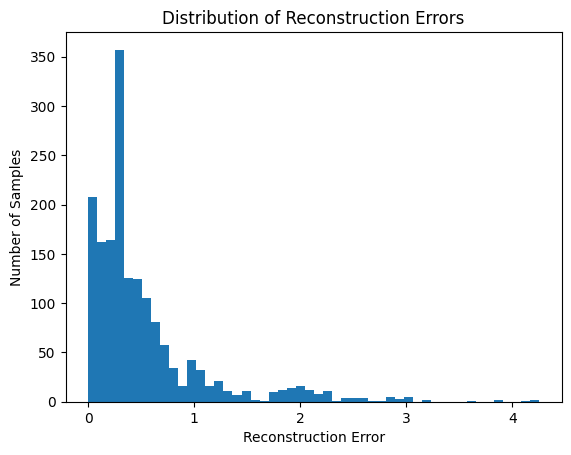

In [ ]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Samples')
plt.title('Distribution of Reconstruction Errors')
plt.show()

In [ ]:
import pickle

# Save the trained model
with open("autoencoder.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully using pickle!")


Model saved successfully using pickle!


In [ ]:
import pickle

with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
torch.save(model, "autoencoder2.pth")

In [ ]:
import requests

# URL of the NHC Tropical Cyclone Status JSON feed
URL = "https://www.nhc.noaa.gov/CurrentStorms.json"

# Fetch the data
RESPONSE = requests.get(URL)

if RESPONSE.status_code == 200:
    DATA = RESPONSE.json()
    ACTIVE_STORMS = DATA.get("activeStorms", [])

    for STORM in ACTIVE_STORMS:
        ISO_TIME = STORM.get("lastUpdate")
        LAT = STORM.get("latitude_numeric")
        LON = STORM.get("longitude_numeric")
        STORM_SPEED = STORM.get("movementSpeed")
        STORM_DIR = STORM.get("movementDir")

        print(f"ISO_TIME: {ISO_TIME}")
        print(f"LAT: {LAT}")
        print(f"LON: {LON}")
        print(f"STORM_SPEED: {STORM_SPEED} mph")
        print(f"STORM_DIR: {STORM_DIR}°")
        print("-" * 40)
else:
    print(f"FAILED TO FETCH DATA: HTTP {RESPONSE.status_code}")


In [ ]:
import requests

# URL of the NHC Tropical Cyclone Status JSON feed
URL = "https://www.nhc.noaa.gov/CurrentStorms.json"

# Fetch the data
RESPONSE = requests.get(URL)

if RESPONSE.status_code == 200:
    DATA = RESPONSE.json()
    ACTIVE_STORMS = DATA.get("activeStorms", [])

    for STORM in ACTIVE_STORMS:
        ISO_TIME = STORM.get("lastUpdate")
        LAT = STORM.get("latitude_numeric")
        LON = STORM.get("longitude_numeric")
        STORM_SPEED = STORM.get("movementSpeed")
        STORM_DIR = STORM.get("movementDir")

        print(f"ISO_TIME: {ISO_TIME}")
        print(f"LAT: {LAT}")
        print(f"LON: {LON}")
        print(f"STORM_SPEED: {STORM_SPEED} mph")
        print(f"STORM_DIR: {STORM_DIR}°")
        print("-" * 40)
else:
    print(f"FAILED TO FETCH DATA: HTTP {RESPONSE.status_code}")


In [ ]:
import requests

URL = "https://www.nhc.noaa.gov/CurrentStorms.json"

RESPONSE = requests.get(URL)

if RESPONSE.status_code == 200:
    print("Raw Response Content:")
    print(RESPONSE.text)  # Print raw response before JSON parsing
    try:
        DATA = RESPONSE.json()
        print("Parsed JSON:", DATA)  # Check if JSON parsing is successful
    except Exception as e:
        print("JSON Parsing Error:", e)
else:
    print(f"FAILED TO FETCH DATA: HTTP {RESPONSE.status_code}")


In [ ]:
X = ab[['Box_cox_mag', 'Box_cox_nearest_city', 'Box_cox_nearest_fault', 'Box_cox_nearest_depth']]
y = ab[['Category_Encoded']]

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Generate dummy data with 4 classes
X, y = make_classification(n_samples=500, n_features=5, n_classes=4,
                           n_informative=4, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, random_state=42)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Make predictions
y_pred = knn.predict(X_test)

# 6. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[22  2  1  1]
 [ 4 13  6  0]
 [ 1  2 19  0]
 [ 0  0  0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.76      0.57      0.65        23
           2       0.73      0.86      0.79        22
           3       0.97      1.00      0.98        29

    accuracy                           0.83       100
   macro avg       0.82      0.82      0.81       100
weighted avg       0.83      0.83      0.82       100



In [ ]:
import joblib

# Save model and scaler
joblib.dump(knn, 'knn_model2.pkl')
joblib.dump(scaler, 'scaler2.pkl')

['scaler2.pkl']